In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
dataset = pd.read_csv('per-capita-plastic-waste-vs-gdp-per-capita.csv')
dataset

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
...,...,...,...,...,...,...,...
48163,Zimbabwe,ZWE,1988,NaN,NaN,9849000.0,NaN
48164,Zimbabwe,ZWE,1989,NaN,NaN,10154000.0,NaN
48165,Zimbabwe,ZWE,2018,NaN,NaN,14439000.0,NaN
48166,Zimbabwe,ZWE,2019,NaN,NaN,14645000.0,NaN


In [3]:
dataset.shape

(48168, 7)

In [4]:
#checking null values in data
dataset.isnull().sum()

Entity                                                     0
Code                                                    2014
Year                                                       0
Per capita plastic waste (kg/person/day)               47982
GDP per capita, PPP (constant 2011 international $)    41761
Total population (Gapminder, HYDE & UN)                 1285
Continent                                              47883
dtype: int64

In [5]:
data=dataset.copy()

In [6]:
#checking percentage of null values in each column
for column in data.columns:
    print("{} has {:.2f}% null values: ".format(column, (data[column].isnull().sum() / len(data))*100))
    print("-"*100)

Entity has 0.00% null values: 
----------------------------------------------------------------------------------------------------
Code has 4.18% null values: 
----------------------------------------------------------------------------------------------------
Year has 0.00% null values: 
----------------------------------------------------------------------------------------------------
Per capita plastic waste (kg/person/day) has 99.61% null values: 
----------------------------------------------------------------------------------------------------
GDP per capita, PPP (constant 2011 international $) has 86.70% null values: 
----------------------------------------------------------------------------------------------------
Total population (Gapminder, HYDE & UN) has 2.67% null values: 
----------------------------------------------------------------------------------------------------
Continent has 99.41% null values: 
---------------------------------------------------------------

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [8]:
#renamaing columns
data.rename(columns={'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP', 
                   'Total population (Gapminder, HYDE & UN)': 'Total Population',
                    'Per capita plastic waste (kg/person/day)': 'Waste per person(kg/day)'}, inplace=True)

In [9]:
data.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [10]:
#removing incomplete/missing data
incomplete_data = data[(data['Total Population'].isna()) & (data['GDP per capita in PPP'].isna())].index
data.drop(incomplete_data, inplace=True)

In [11]:
data.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN


In [12]:
#getting rows with year 2010
data_2010 = data[data['Year']==2010]
data_2010 = data_2010.drop(columns='Continent')

In [13]:
data_2010

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04
...,...,...,...,...,...,...
47341,Western Sahara,ESH,2010,NaN,NaN,4.800000e+05
47371,World,OWID_WRL,2010,NaN,13175.933989,6.956824e+09
47503,Yemen,YEM,2010,0.103,4478.743599,2.315500e+07
47746,Zambia,ZMB,2010,NaN,3279.277161,1.360600e+07


In [14]:
#getting rows with year 2015
data_2015 = data[data['Year']==2015]
data_2015['Continent']=data_2015['Continent'].values

<ipython-input-14-e59f0f86c78f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2015['Continent']=data_2015['Continent'].values


In [15]:
data_2015.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
14,Afghanistan,AFG,2015,NaN,1809.016488,3.441400e+07,Asia
338,Africa,NaN,2015,NaN,NaN,1.182439e+09,NaN
369,Albania,ALB,2015,NaN,10970.452245,2.891000e+06,Europe
589,Algeria,DZA,2015,NaN,13724.723853,3.972800e+07,Africa
849,American Samoa,ASM,2015,NaN,NaN,5.600000e+04,Oceania


In [16]:
#dropping rows with missing continent values
drop_cont = data_2015[data_2015['Continent'].isna()].index
data_2015.drop(drop_cont, inplace=True)

F:\anaconda\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
data_2015.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
14,Afghanistan,AFG,2015,NaN,1809.016488,34414000.0,Asia
369,Albania,ALB,2015,NaN,10970.452245,2891000.0,Europe
589,Algeria,DZA,2015,NaN,13724.723853,39728000.0,Africa
849,American Samoa,ASM,2015,NaN,NaN,56000.0,Oceania
1069,Andorra,AND,2015,NaN,NaN,78000.0,Europe


In [18]:
#dropping rows with missing per person waste generation values
data_2010 = data_2010[data_2010['Waste per person(kg/day)'].notna()]
new_2010 = data_2010.reset_index().drop('index', axis=1)

In [19]:
new_2010.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population
0,Albania,ALB,2010,0.069,9927.181841,2948000.0
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0
2,Angola,AGO,2010,0.062,5897.682841,23356000.0
3,Anguilla,AIA,2010,0.252,NaN,13000.0
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0


In [20]:
#importing 2nd file
df = pd.read_csv('per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')

In [21]:
df.head()

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [23]:
df.rename(columns={'Per capita mismanaged plastic waste': 'Mismanaged waste per person(kg/day)',
                  'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP',
                  'Total population (Gapminder, HYDE & UN)': 'Total Population'}, inplace=True)

In [26]:
df_2010 = df[df.Year==2010]
df_2010 = df_2010.drop(['Continent'], axis=1)
df_2010.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.032,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.086,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


In [27]:
#dropping rows with missing waste value
df_2010=df_2010[df_2010['Mismanaged waste per person(kg/day)'].isna() != True]
df2_2010 = df_2010.reset_index().drop('index', axis=1)

In [28]:
df2_2010.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
0,Albania,ALB,2010,0.032,9927.181841,2948000.0
1,Algeria,DZA,2010,0.086,12870.602699,35977000.0
2,Angola,AGO,2010,0.045,5897.682841,23356000.0
3,Anguilla,AIA,2010,0.010,NaN,13000.0
4,Antigua and Barbuda,ATG,2010,0.051,19212.720131,88000.0


In [29]:
#combining new2010 and df2010
df_combined = pd.merge(new_2010, df_2010, how='inner')

In [30]:
df_combined.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Mismanaged waste per person(kg/day)
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,0.032
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,0.086
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,0.045
3,Anguilla,AIA,2010,0.252,NaN,13000.0,0.010
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,0.051


In [32]:
#converting column to list
df_combined.columns.tolist()
col_names = ['Entity','Code','Year','Waste per person(kg/day)','Mismanaged waste per person(kg/day)',
           'GDP per capita in PPP','Total Population']
df_combined = df_combined[col_names]
df_combined.iloc[:,3:5]=np.around(df_combined[['Waste per person(kg/day)', 
                                                            'Mismanaged waste per person(kg/day)']], decimals=2)

In [34]:
df_combined['Total Population'] = df_combined['Total Population'].astype(int)

In [35]:
#total waste by country
df_combined['Total waste(kgs/year)'] = ((df_combined['Waste per person(kg/day)']* 
                                        df_combined['Total Population'])*365)
df_combined['Total waste mismanaged(kgs/year)'] = ((df_combined['Mismanaged waste per person(kg/day)']*
                                                   df_combined['Total Population'])*365)

In [37]:
df_combined.head()

,Entity,Code,Year,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Total waste(kgs/year),Total waste mismanaged(kgs/year)
0,Albania,ALB,2010,0.07,0.03,9927.181841,2948000,7.532140e+07,3.228060e+07
1,Algeria,DZA,2010,0.14,0.09,12870.602699,35977000,1.838425e+09,1.181844e+09
2,Angola,AGO,2010,0.06,0.04,5897.682841,23356000,5.114964e+08,3.409976e+08
3,Anguilla,AIA,2010,0.25,0.01,NaN,13000,1.186250e+06,4.745000e+04
4,Antigua and Barbuda,ATG,2010,0.66,0.05,19212.720131,88000,2.119920e+07,1.606000e+06


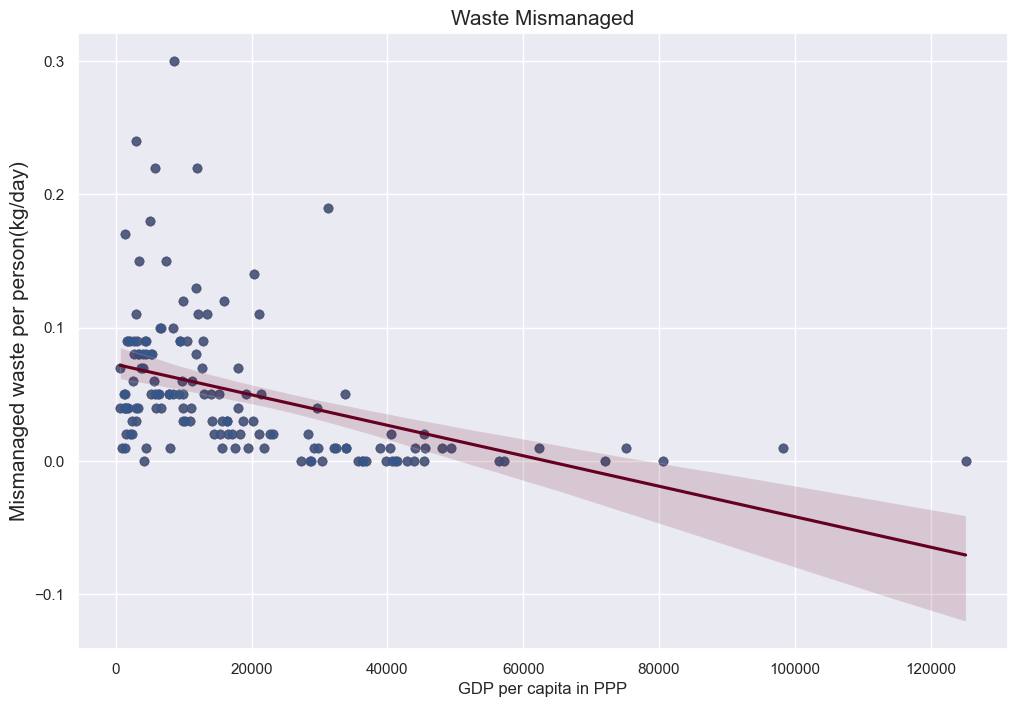

In [39]:
#graph
plt.figure(1, figsize=(12,8))
plt.scatter(df_combined['GDP per capita in PPP'], df_combined['Mismanaged waste per person(kg/day)'])
plt.title('Waste Mismanaged', loc='center', fontsize=15)
plt.ylabel('Mismanaged waste', loc='center', fontsize=15)
plt.xlabel('GDP per capita', fontsize=12)

sns.regplot(x='GDP per capita in PPP', y='Mismanaged waste per person(kg/day)', data=df_combined,
           scatter_kws={'color': '#34568B'}, line_kws={'color': '#650021'})

plt.show()

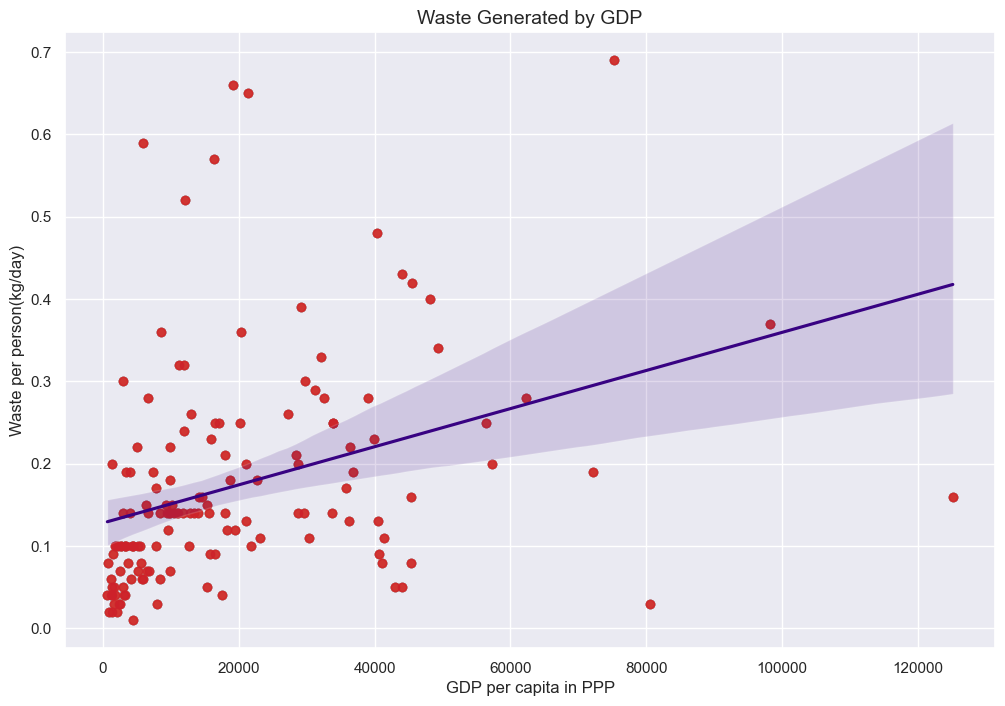

In [41]:
plt.figure(2, figsize=(12,8))
plt.scatter(df_combined['GDP per capita in PPP'], df_combined['Waste per person(kg/day)'])
plt.title('Waste Generated by GDP', loc='center', fontsize=14)
plt.ylabel('Waste per person(kg/day)', loc='center', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)

sns.regplot(x=df_combined['GDP per capita in PPP'], y=df_combined['Waste per person(kg/day)'],
           scatter_kws={'color': '#CD212A'}, line_kws={'color': '#380282'})

plt.show()